In [1]:
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
from itertools import product
from itertools import combinations
from scipy.stats import chi2_contingency
# Otros objetivos
# -----------------------------------------------------------------------
import math
# Funciones
import sys
sys.path.append('../../') #pongo los 2 puntos para que salga de la carpeta
import src.funciones as f
import src.soporte_prep as spp

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

# Nulos 
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.linear_model import BayesianRidge
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
df_general = pd.read_csv('../../Datos/general_data.csv')
df_employee_survey = pd.read_csv('../../Datos/employee_survey_data.csv')
df_manager_survey = pd.read_csv('../../Datos/manager_survey_data.csv')

# EDA

## Data frame general

In [3]:
df_general.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


In [4]:
df_general.shape

(4410, 24)

In [5]:
df_general.nunique()

Age                          43
Attrition                     2
BusinessTravel                3
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
EmployeeCount                 1
EmployeeID                 4410
Gender                        2
JobLevel                      5
JobRole                       9
MaritalStatus                 3
MonthlyIncome              1349
NumCompaniesWorked           10
Over18                        1
PercentSalaryHike            15
StandardHours                 1
StockOptionLevel              4
TotalWorkingYears            40
TrainingTimesLastYear         7
YearsAtCompany               37
YearsSinceLastPromotion      16
YearsWithCurrManager         18
dtype: int64

De esta forma, puedo comprobar las categorías en las variables del mismo tipo.

In [6]:
df_general.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

Aquí voy observando los nulos que tengo en mis datos, señalando que solo tengo nulos en una columna: NumCompaniesWorked (19 nulos).

## Datos de la encuesta a empleados

In [7]:
df_employee_survey.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [8]:
df_employee_survey.nunique()

EmployeeID                 4410
EnvironmentSatisfaction       4
JobSatisfaction               4
WorkLifeBalance               4
dtype: int64

In [9]:
df_employee_survey.isna().sum()

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

En la encuesta realizada a los empleados, puedo observar que tengo nulos en todas las variables que hacen referencia a las preguntas de la encuesta. Sin embargo, no tengo nulos en el EmployeeID lo que me indica buena señal.

## Datos de la encuesta realizada a los managers

In [10]:
df_manager_survey.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [11]:
df_manager_survey.nunique()

EmployeeID           4410
JobInvolvement          4
PerformanceRating       2
dtype: int64

In [12]:
df_manager_survey.isna().sum()

EmployeeID           0
JobInvolvement       0
PerformanceRating    0
dtype: int64

En la encuesta realizada a los managers, no tengo nulos en ningún lugar.

## Mergeo

In [13]:
df_mergeo = df_general.merge(df_employee_survey, on='EmployeeID', how='inner') \
               .merge(df_manager_survey, on='EmployeeID', how='inner')

In [14]:
df_mergeo.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [15]:
df_mergeo.shape

(4410, 29)

In [16]:
df_mergeo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [17]:
df_mergeo.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

He identificado que tengo 4 columnas con nulo, más adelante veo qué puedo hacer.

In [18]:
df_mergeo[pd.isnull(df_mergeo['NumCompaniesWorked'])]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
115,27,No,Travel_Rarely,Sales,2,3,Life Sciences,1,116,Male,1,Sales Executive,Divorced,23670,NaN,Y,12,8,1,5.0,2,5,0,4,4.0,2.0,3.0,3,3
210,52,No,Travel_Rarely,Sales,2,1,Medical,1,211,Male,1,Laboratory Technician,Divorced,99800,NaN,Y,11,8,1,18.0,2,10,6,9,4.0,1.0,3.0,3,3
343,40,No,Travel_Frequently,Sales,9,3,Marketing,1,344,Male,3,Manufacturing Director,Single,22380,NaN,Y,14,8,0,10.0,3,1,0,0,1.0,3.0,3.0,3,3
476,22,No,Travel_Rarely,Research & Development,8,3,Other,1,477,Male,2,Sales Representative,Married,49070,NaN,Y,21,8,1,4.0,2,4,1,1,2.0,1.0,2.0,3,4
647,29,No,Travel_Rarely,Research & Development,3,3,Technical Degree,1,648,Female,2,Healthcare Representative,Divorced,48050,NaN,Y,16,8,1,9.0,2,7,1,7,4.0,4.0,2.0,3,3
799,29,Yes,Travel_Frequently,Research & Development,28,3,Medical,1,800,Female,5,Research Scientist,Single,44340,NaN,Y,17,8,3,7.0,1,5,0,0,1.0,2.0,1.0,3,3
932,32,No,Travel_Rarely,Research & Development,5,4,Technical Degree,1,933,Male,5,Research Scientist,Divorced,50030,NaN,Y,13,8,0,10.0,5,9,1,6,4.0,2.0,2.0,3,3
1103,26,No,Travel_Frequently,Sales,16,2,Life Sciences,1,1104,Male,2,Healthcare Representative,Married,83800,NaN,Y,14,8,0,8.0,3,7,7,7,3.0,4.0,3.0,4,3
1312,37,Yes,Travel_Rarely,Human Resources,9,3,Human Resources,1,1313,Male,2,Healthcare Representative,Divorced,54840,NaN,Y,17,8,0,7.0,4,3,0,2,3.0,1.0,3.0,3,3
1521,31,No,Travel_Rarely,Research & Development,20,1,Technical Degree,1,1522,Female,3,Research Scientist,Married,99070,NaN,Y,13,8,1,6.0,3,5,0,3,3.0,4.0,3.0,2,3


In [19]:
df_mergeo.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129,2.723603,2.728246,2.761436,2.729932,3.153741
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327,1.092756,1.101253,0.706245,0.711400,0.360742
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [20]:
df_mergeo.describe(include='O')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18
count,4410,4410,4410,4410,4410,4410,4410,4410
unique,2,3,3,6,2,9,3,1
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y
freq,3699,3129,2883,1818,2646,978,2019,4410


## Exploración

In [21]:
f.exploracion_dataframe(df_mergeo, 'Attrition')

El número de datos es 4410 y el de columnas es 29

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
NumCompaniesWorked,0.430839
TotalWorkingYears,0.204082
EnvironmentSatisfaction,0.566893
JobSatisfaction,0.453515
WorkLifeBalance,0.861678



 ..................... 

Los tipos de las columnas son:


,tipo_dato
Age,int64
Attrition,object
BusinessTravel,object
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeID,int64
Gender,object



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna Attrition tiene los siguientes valores únicos:


,count
Attrition,
No,3699
Yes,711


La columna BusinessTravel tiene los siguientes valores únicos:


,count
BusinessTravel,
Travel_Rarely,3129
Travel_Frequently,831
Non-Travel,450


La columna Department tiene los siguientes valores únicos:


,count
Department,
Research & Development,2883
Sales,1338
Human Resources,189


La columna EducationField tiene los siguientes valores únicos:


,count
EducationField,
Life Sciences,1818
Medical,1392
Marketing,477
Technical Degree,396
Other,246
Human Resources,81


La columna Gender tiene los siguientes valores únicos:


,count
Gender,
Male,2646
Female,1764


La columna JobRole tiene los siguientes valores únicos:


,count
JobRole,
Sales Executive,978
Research Scientist,876
Laboratory Technician,777
Manufacturing Director,435
Healthcare Representative,393
Manager,306
Sales Representative,249
Research Director,240
Human Resources,156


La columna MaritalStatus tiene los siguientes valores únicos:


,count
MaritalStatus,
Married,2019
Single,1410
Divorced,981


La columna Over18 tiene los siguientes valores únicos:


,count
Over18,
Y,4410


### Observaciones:
- No tenemos duplicados, tenemos un conjunto de datos de 4,410 empleados con unas 29 columnas (luego de haber unido mis 3 conjuntos de datos).
- Hay nulos en 5 columnas.
- Existe desbalanceo en mi variable respuesta 'Attrition.
- Existen columnas numéricas que en realidad son categóricas, i.e. Education.
- Existen 2 columnas que no aportan datos: EmployeeCount (hace un conteo a uno de cada empleado) y over18(que confirma si el empleado tiene más de 18 años, cosa que queda reafirmada ya en una columna de Edad)

- En el último año se han ido de la empresa 711 personas (16%). 
- Tengo una población mayormente masculina (60%)
- En su mayoría son personas casadas, por encima de los solteros y divorciados (45%)
- Tengo una media de edad de 36 años, con una desviación estándar de 9 años.


In [22]:
df_mergeo.drop(columns=['Over18', 'EmployeeCount', 'StandardHours', 'EmployeeID'], inplace=True)

Estas columnas en sí no aportan nada, me las llevo.

In [23]:
df_mergeo.shape

(4410, 25)

Vamos a mappear mi columna Attrition, para ya dejar claro si se ha ido o no en el último año de manera numérica.

- Anteriormente teníamos una columna (EmployeeID) que nos identificaba de manera individual a cada persona. Ya que la hemos eliminado, veamos si encontramos duplicados.

In [24]:
df_mergeo[df_mergeo.duplicated()]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
1471,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
1472,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
1473,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
1474,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3
1475,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,Female,4,Research Director,Married,40710,3.0,13,0,28.0,5,7,7,7,3.0,2.0,2.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,No,Travel_Rarely,Sales,4,3,Other,Female,2,Human Resources,Single,35390,1.0,18,0,6.0,2,6,1,5,3.0,4.0,3.0,2,3
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,Female,1,Research Scientist,Single,60290,3.0,17,1,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,Male,1,Laboratory Technician,Divorced,26790,2.0,15,0,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,Male,2,Sales Executive,Married,37020,0.0,20,0,5.0,4,4,1,2,1.0,3.0,3.0,3,4


- Al volver a verificar nuestros datos, nos hemos encontrado que existe una alta cantidad de duplicados. Esto puede ser producto de una recolección de datos que no haya sido clara y/o efectiva. Al identificar estos usuarios con un único ID podíamos pasar por alto esto, pero una vez eliminada dicha columna nos encontramos con el detalle de que más de 2000 empleados poseen las mismas características, idénticas. Esto no tienen mucho sentido al considerar que tenemos en cuenta más de 20 variables distintas. Por esta razón, vamos a eliminar los duplicados.

In [25]:
duplicados = df_mergeo.duplicated().sum()
porcentaje_duplicados = (duplicados / len(df_mergeo)) * 100

In [26]:
print(f"Cantidad de duplicados: {duplicados}")
print(f"Porcentaje de duplicados: {porcentaje_duplicados:.2f}%")

Cantidad de duplicados: 2837
Porcentaje de duplicados: 64.33%


- Como muestro, la cantidad de duplicados está por encima del 50% de mis datos originales, lo que nos hace ver que la recolección original de estos datos tuvo ciertos inconvenientes.

In [27]:
df_mergeo.drop_duplicates(inplace=True)

In [28]:
df_mergeo.reset_index(drop=True, inplace=True)

In [29]:
df_mergeo.shape

(1573, 25)

Al eliminar una gran cantidad de duplicados, nos quedamos con un conjunto de datos que no tendrá duplicados para sobre-entrenarse por lo que las métricas esperadas deberían no ser tan buenas.

In [30]:
df_num, df_cat = f.separar_dataframes(df_mergeo)

In [31]:
df_mergeo.describe()

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1554.000000,1573.000000,1573.000000,1564.000000,1573.000000,1573.000000,1573.000000,1573.000000,1550.000000,1555.000000,1538.000000,1573.000000,1573.000000
mean,36.904005,9.158296,2.911634,2.056580,64979.459631,2.703990,15.202161,0.790210,11.245524,2.807374,6.970757,2.184361,4.102988,2.718065,2.737621,2.761378,2.732994,3.152575
std,9.105911,8.124414,1.022867,1.108022,47121.739301,2.508432,3.646403,0.848876,7.748763,1.287203,6.068348,3.203105,3.572701,1.090423,1.100763,0.701994,0.712421,0.359691
min,18.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,30.000000,2.000000,2.000000,1.000000,28990.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,2.000000,49000.000000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,3.000000,83800.000000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,60.000000,29.000000,5.000000,5.000000,199990.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [32]:
df_mergeo.describe(include='O')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
count,1573,1573,1573,1573,1573,1573,1573
unique,2,3,3,6,2,9,3
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married
freq,1321,1117,1030,655,953,348,720


In [33]:
f.exploracion_dataframe(df_mergeo, 'Attrition')

El número de datos es 1573 y el de columnas es 25

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
NumCompaniesWorked,1.207883
TotalWorkingYears,0.572155
EnvironmentSatisfaction,1.462174
JobSatisfaction,1.144310
WorkLifeBalance,2.225048



 ..................... 

Los tipos de las columnas son:


,tipo_dato
Age,int64
Attrition,object
BusinessTravel,object
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
Gender,object
JobLevel,int64
JobRole,object



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna Attrition tiene los siguientes valores únicos:


,count
Attrition,
No,1321
Yes,252


La columna BusinessTravel tiene los siguientes valores únicos:


,count
BusinessTravel,
Travel_Rarely,1117
Travel_Frequently,297
Non-Travel,159


La columna Department tiene los siguientes valores únicos:


,count
Department,
Research & Development,1030
Sales,477
Human Resources,66


La columna EducationField tiene los siguientes valores únicos:


,count
EducationField,
Life Sciences,655
Medical,489
Marketing,167
Technical Degree,144
Other,90
Human Resources,28


La columna Gender tiene los siguientes valores únicos:


,count
Gender,
Male,953
Female,620


La columna JobRole tiene los siguientes valores únicos:


,count
JobRole,
Sales Executive,348
Research Scientist,308
Laboratory Technician,278
Manufacturing Director,157
Healthcare Representative,145
Manager,107
Sales Representative,91
Research Director,85
Human Resources,54


La columna MaritalStatus tiene los siguientes valores únicos:


,count
MaritalStatus,
Married,720
Single,496
Divorced,357


Luego de explorar los datos, ya sin duplicados, me doy cuenta de que en las variables categóricas se mantiene el orden de categorías. Se diminuye en cantidad pero las que eran representativas para el conjunto completo, siguen estando en el top de cada una.

In [34]:
df_mergeo['Attrition'] = df_mergeo['Attrition'].map({'Yes': 1, 'No': 0})

## Visualizaciones

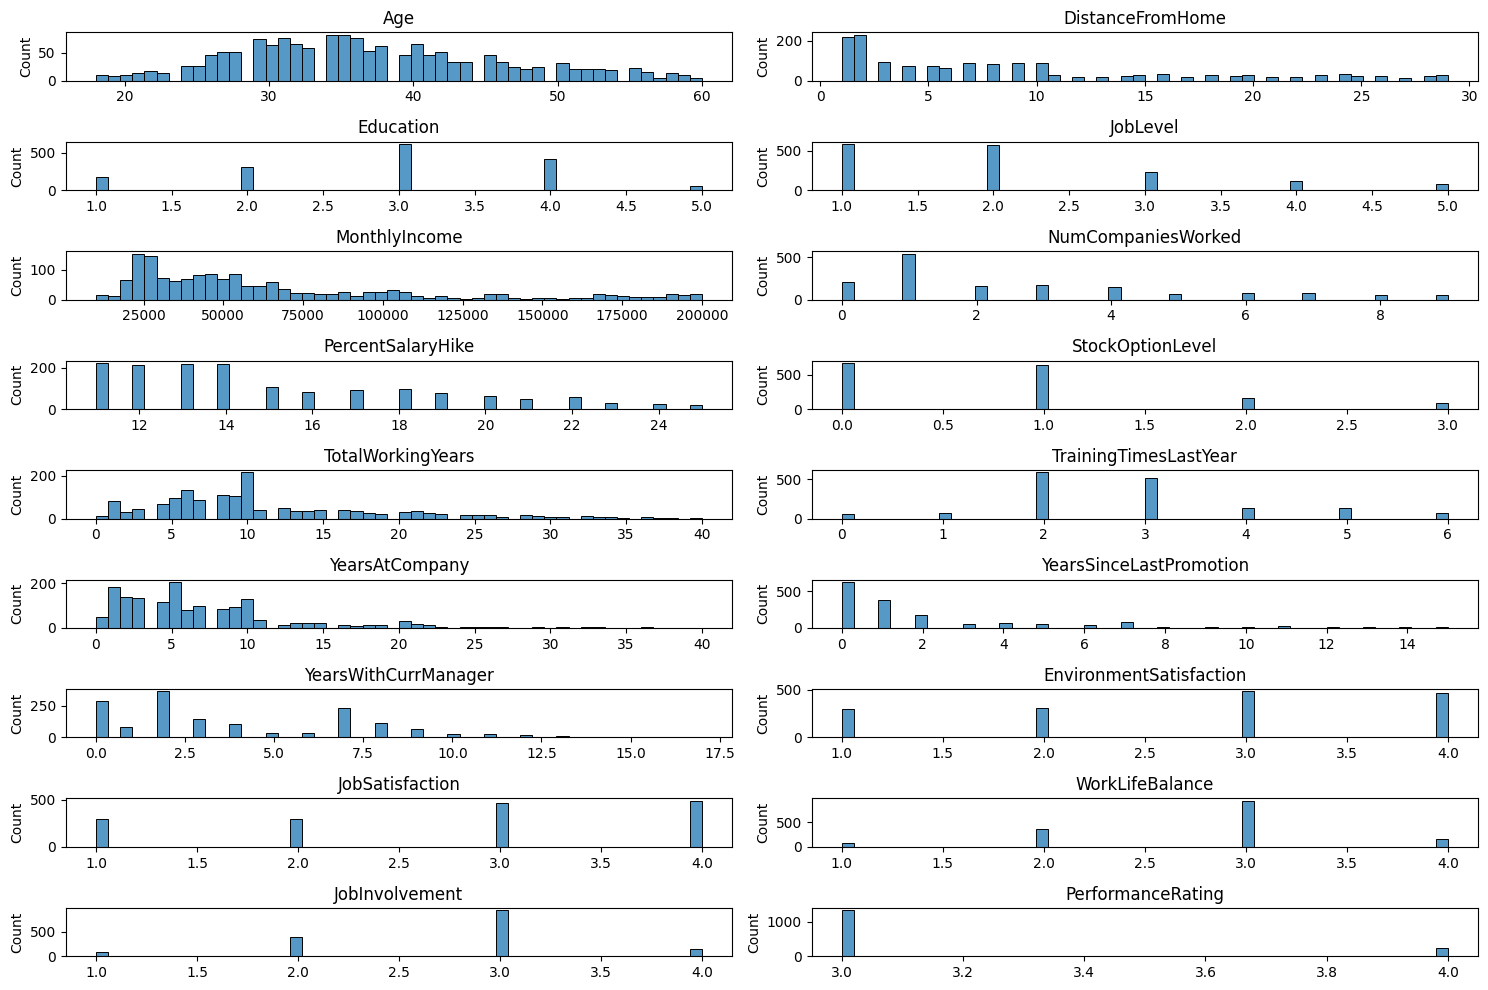

In [35]:
f.plot_numericas(df_num, figsize=(15,10))

Con esta visualización puedo comprobar la distribución de mis variables. De igual forma, veo cuáles corresponden mejor a variables categóricas que a numéricas.

In [36]:
df_mergeo['Education'] = df_mergeo['Education'].astype('category')
df_mergeo['JobLevel'] = df_mergeo['JobLevel'].astype('category')
df_mergeo['StockOptionLevel'] = df_mergeo['StockOptionLevel'].astype('category')
df_mergeo['EnvironmentSatisfaction'] = df_mergeo['EnvironmentSatisfaction'].astype('O')
df_mergeo['JobSatisfaction'] = df_mergeo['JobSatisfaction'].astype('O')
df_mergeo['WorkLifeBalance'] = df_mergeo['WorkLifeBalance'].astype('O')
df_mergeo['JobInvolvement'] = df_mergeo['JobInvolvement'].astype('category')
df_mergeo['PerformanceRating'] = df_mergeo['PerformanceRating'].astype('category')
df_mergeo['TrainingTimesLastYear'] = df_mergeo['TrainingTimesLastYear'].astype('category')
# df_mergeo['NumCompaniesWorked'] = df_mergeo['NumCompaniesWorked'].astype('category')

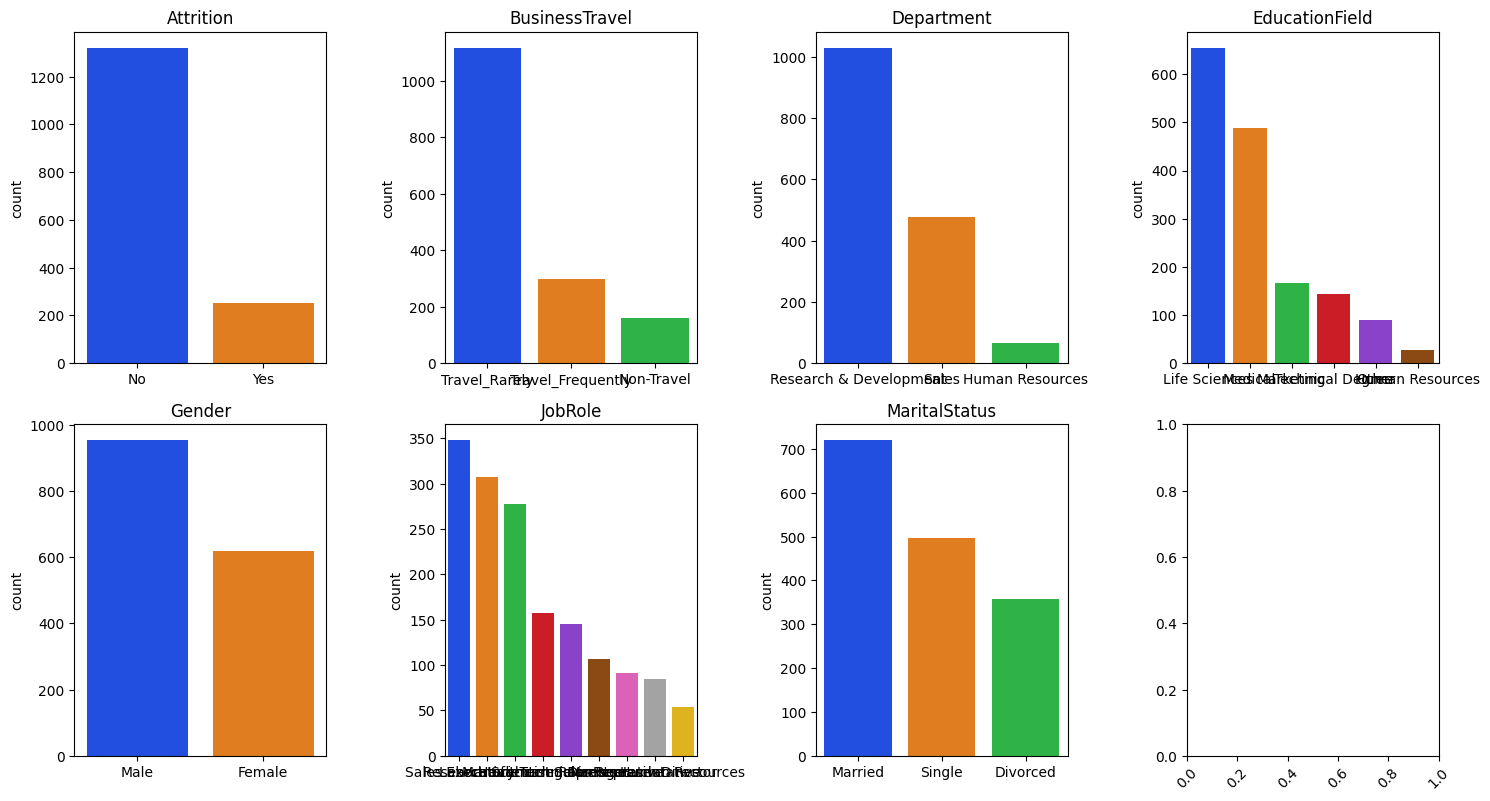

In [37]:
f.plot_categoricas(df_cat)

Con relación a mis variables categóricas, aquí puedo ver el conteo de sus categorías desde la que más presencia tiene hasta la de menor presencia.

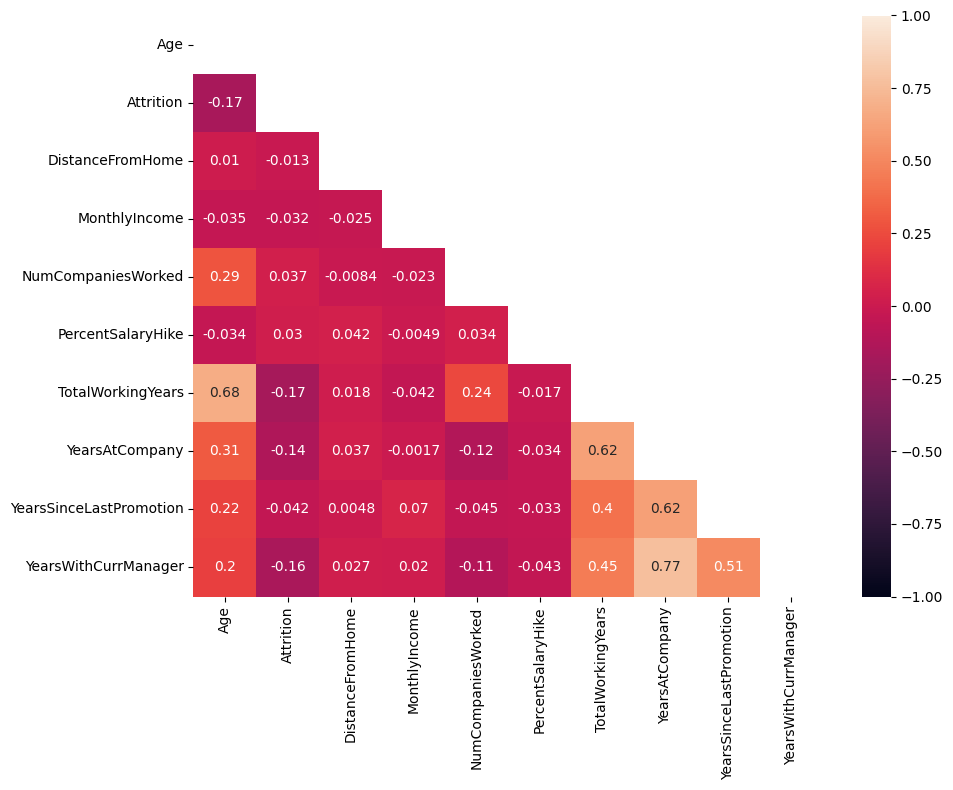

In [38]:
f.matriz_correlacion(df_mergeo, figsize=(10,8))

## Observaciones respecto a las correlaciones: 
- Se observa una correlación positiva entre los años de trabajo y la edad (0.68). Tiene sentido que se relacionen ya que estas pueden tener mucha congruencia.
- Los años en la compañía y el tiempo de trabajo también presentan una correlación positiva (0.62). Representa una relación lógica en el ámbito laboral.
- El tiempo en la compañía y los años bajo el mismo manager también presentan una alta correlación (0.77). Esta, por igual, tiene mucho sentido a la hora de una buena relación laboral. Si esto es positivo normalmente arroja un buen trabajo de los gerentes o supervisores.

### Llamada a la clase del src

In [39]:
visuales = spp.Visualizador(df_mergeo)

BusinessTravel
Department
Education
EducationField
Gender
JobLevel
JobRole
MaritalStatus
StockOptionLevel
TrainingTimesLastYear
EnvironmentSatisfaction
JobSatisfaction
WorkLifeBalance
JobInvolvement
PerformanceRating


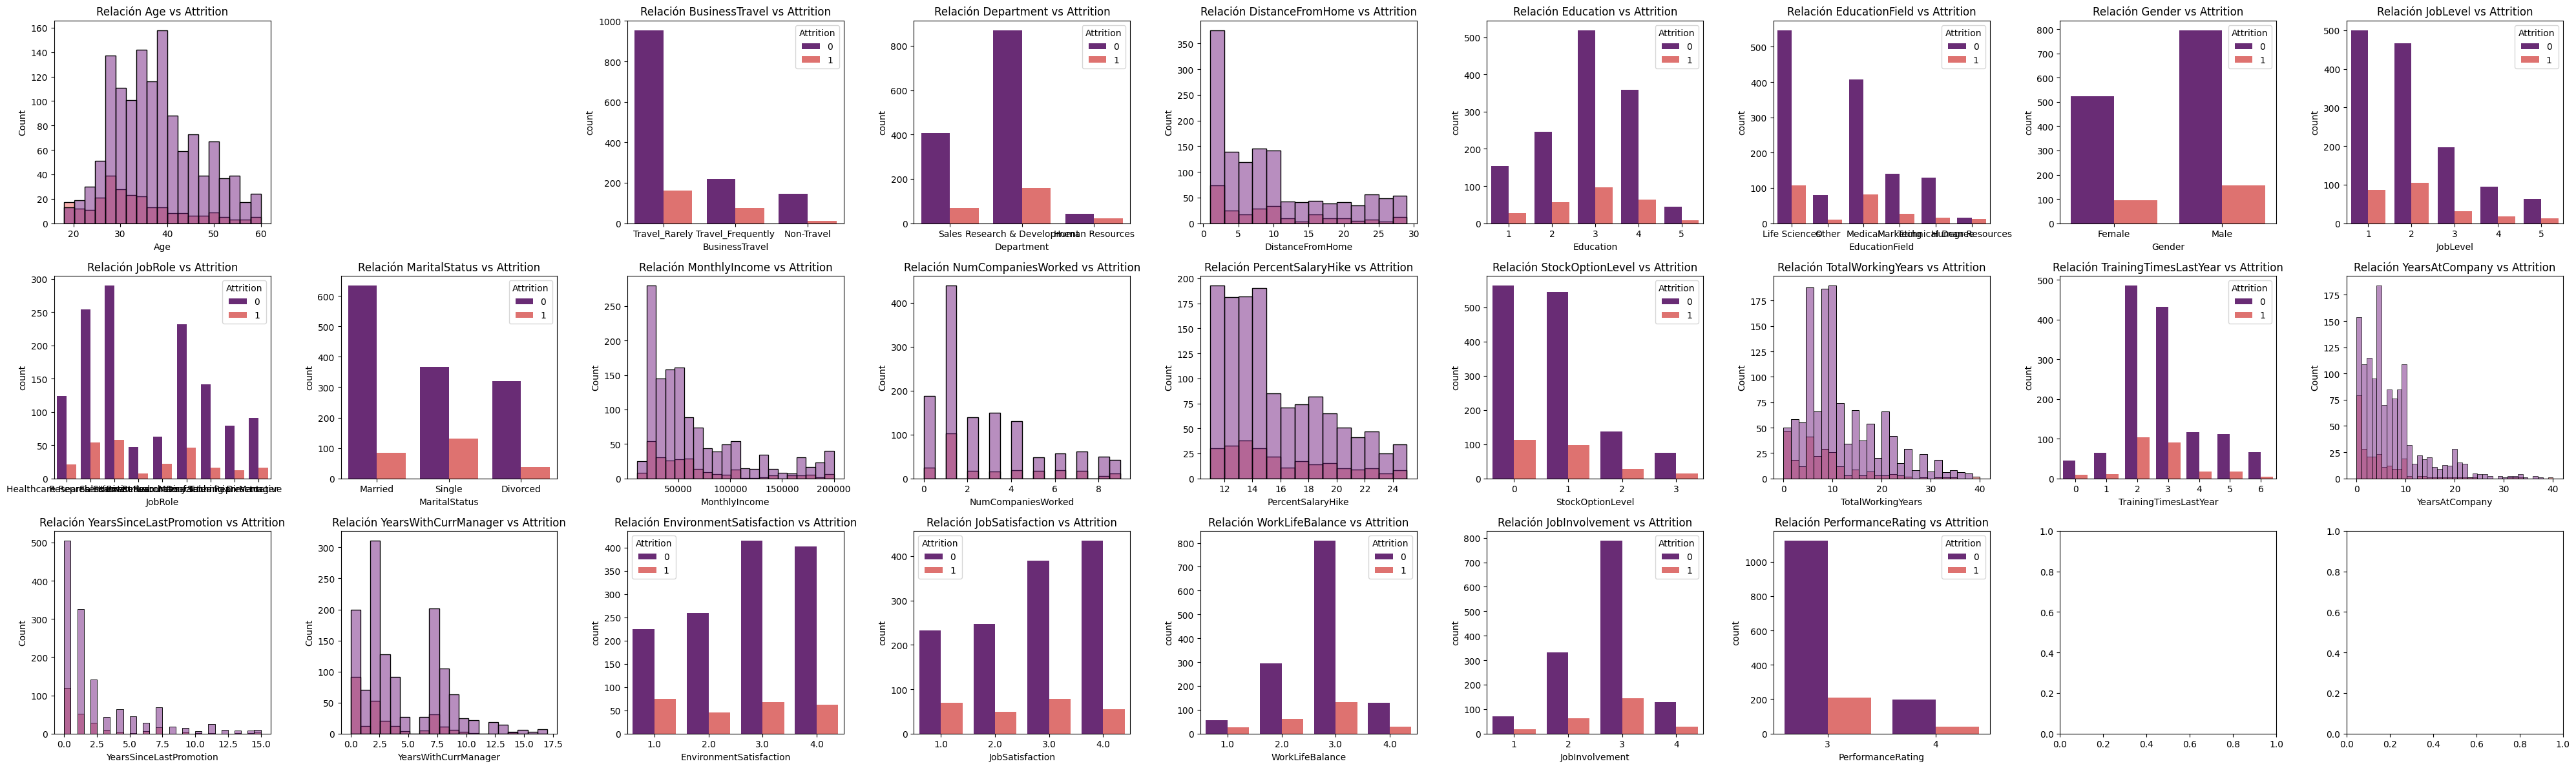

In [40]:
visuales.plot_relacion('Attrition')

## Relaciones VR con variables numéricas

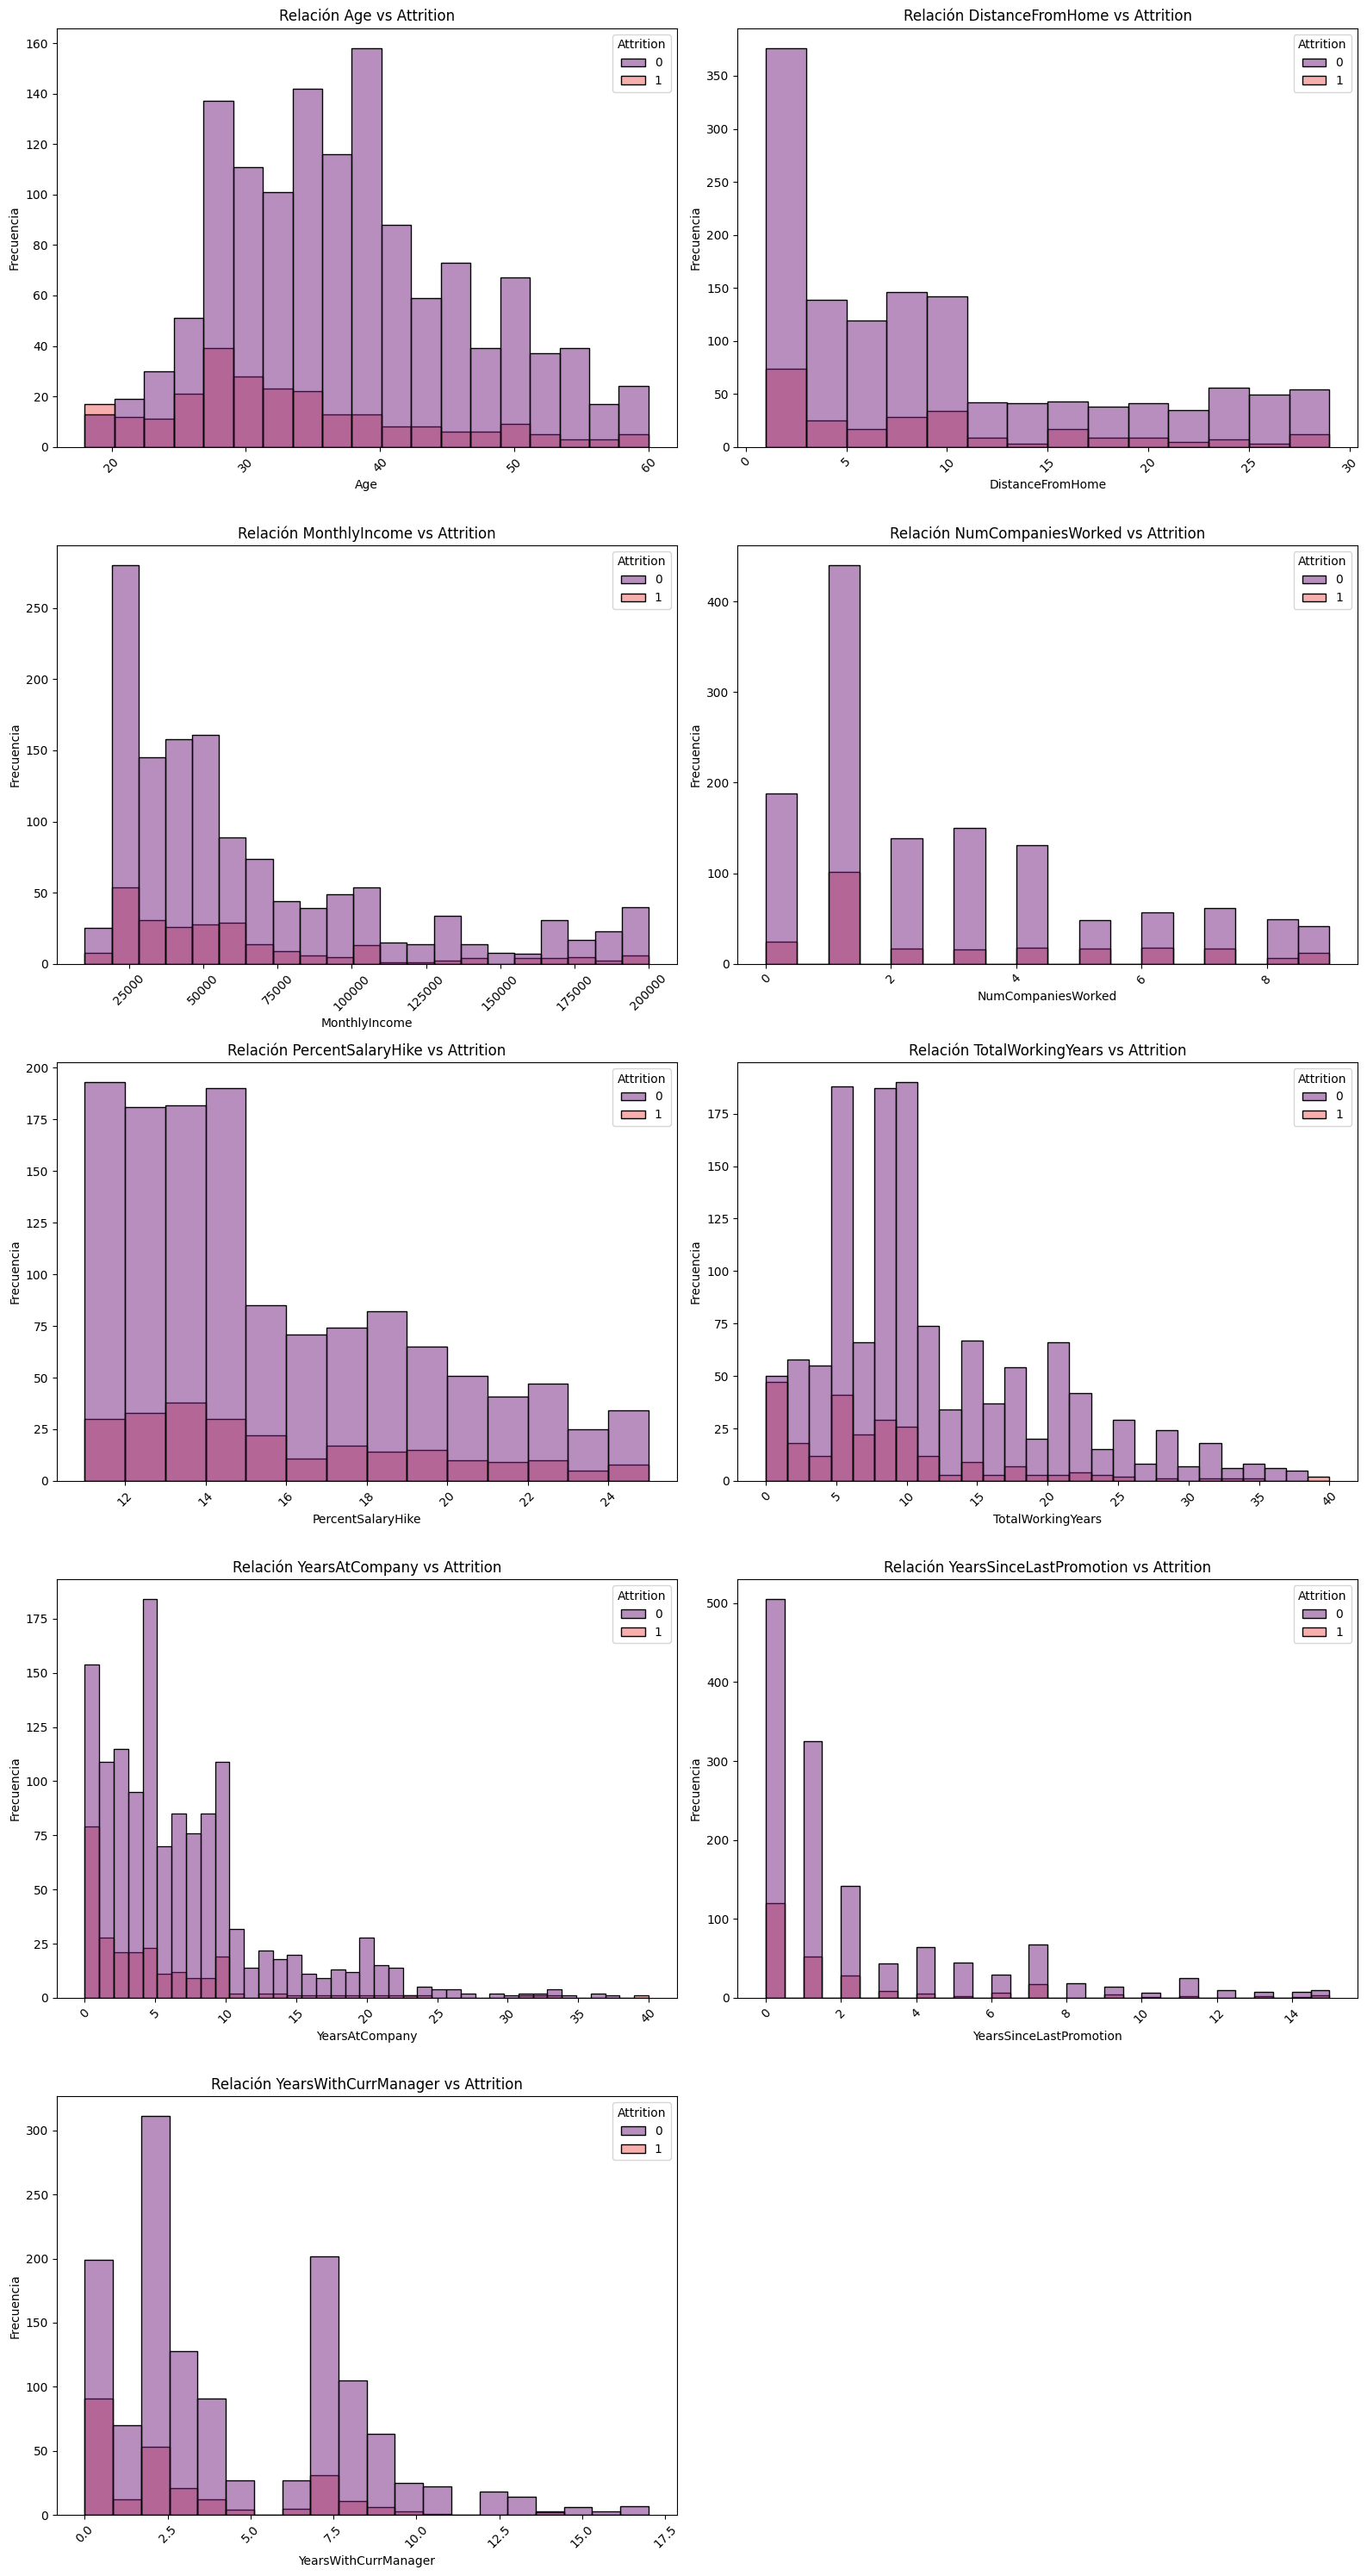

In [41]:
f.graficar_relaciones_numericas(df_mergeo, 'Attrition')

## Observaciones:
- Podemos mencionar que:
    - Antes de llegar a los 30 años, es que se presenta el punto más alto entre los empleados que se fueron en el año anterior. A partir de este punto, los valores empiezan a disminuir. 
    - Aquellos que se encuentran a menor distancia son los que, en su mayoría, se fueron.
    - En cuanto a salario, aquellos que se mantienen por debajo de la media son los que mayormente se fueron. Tomo la media como referencia porque esta es más alta, la mediana que es inferior se encuentra dentro de este grupos de salidas.
    - En relación al PErcentSalaryHike, no se ven patrones muy relevantes a señalar pero sí se puede comentar que aquellos con menor pocentaje de aumento son los que se presentan más en los casos de salidas.
    - En los años trabajados en total, el primer año es el que tiene más presencia de salida. Esto quiere decir que existe algo que sucede aquí porque también hay mucha salida en el primer año en la compañía para muchas personas. Esto se ve reflejado en el primer año dentro de todas las posibles circunstancias porque se refleja en el primer año bajo un mismo manager y en el primer año desde el cual se ha recibido un ascenso.


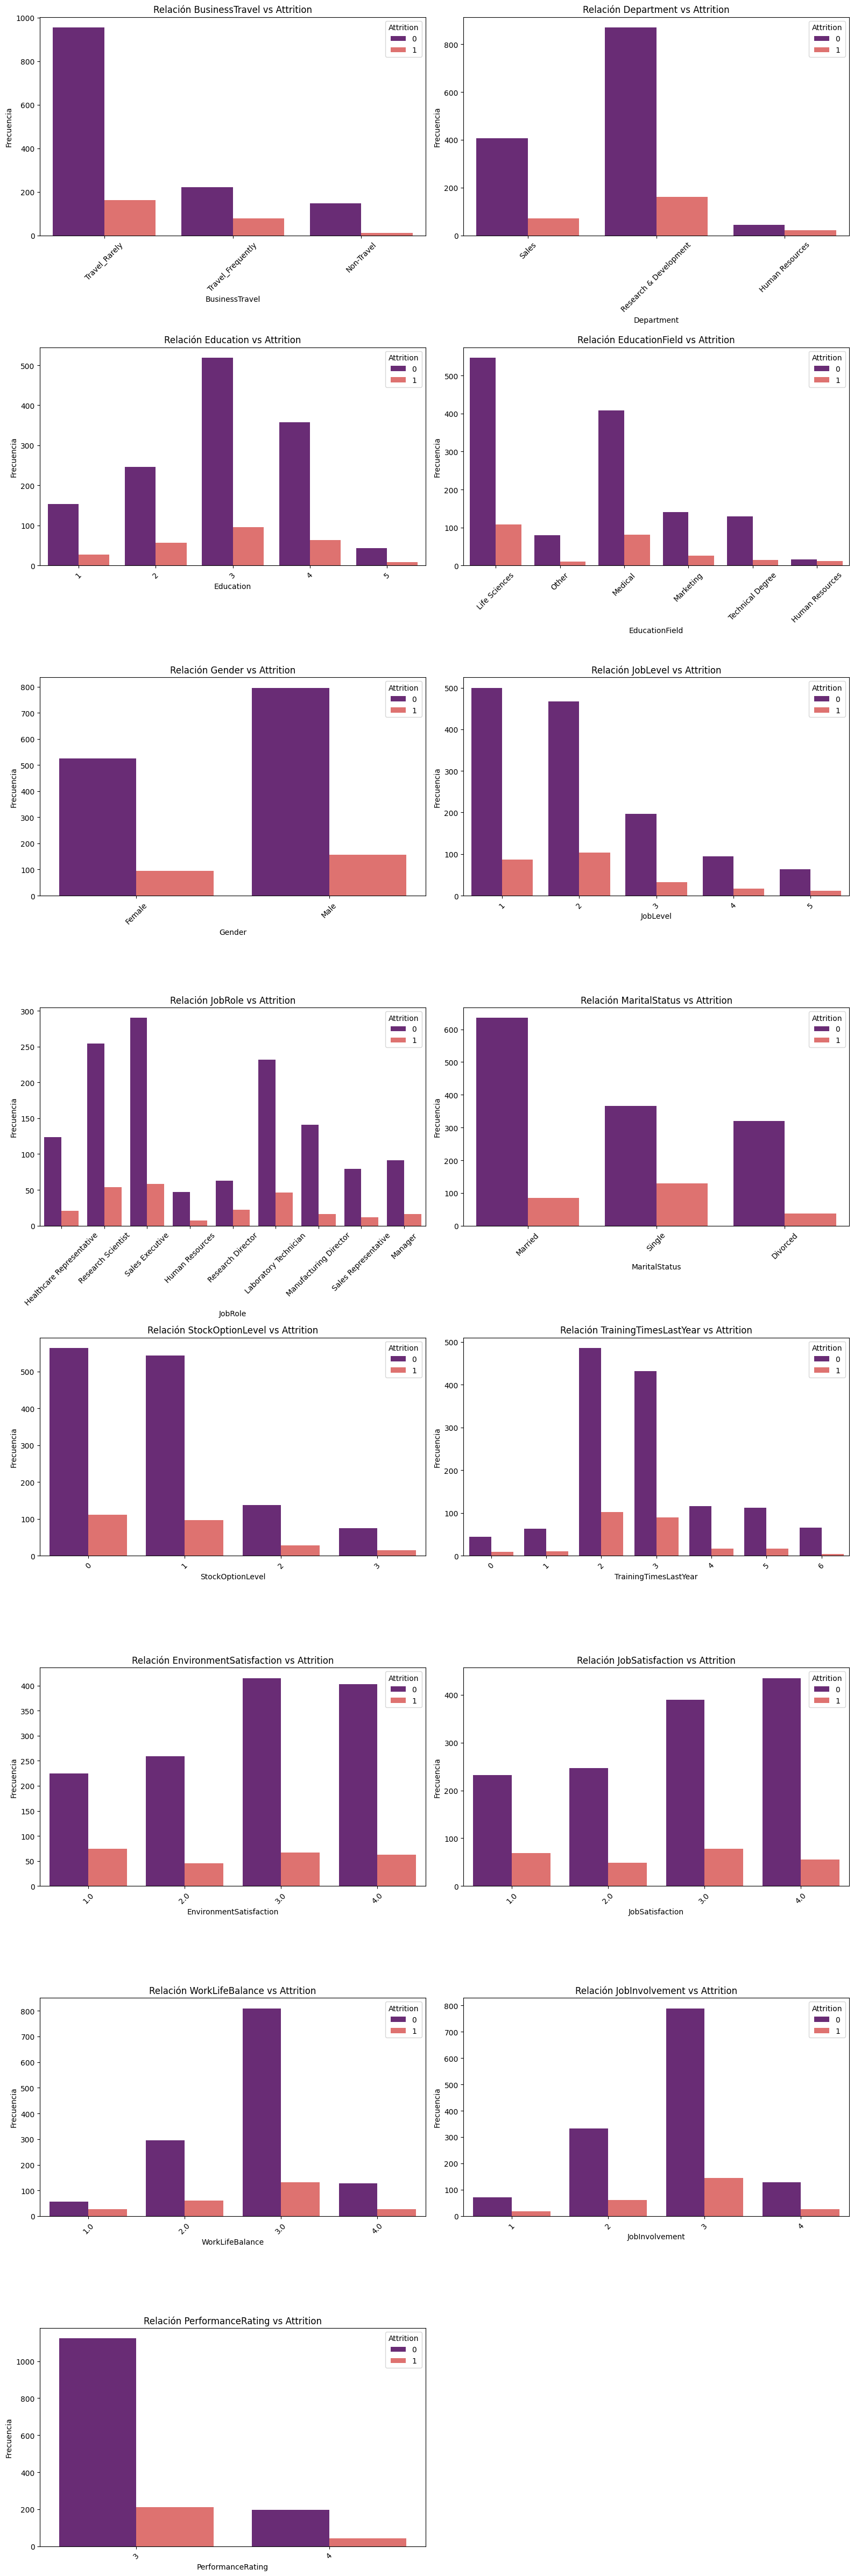

In [42]:
f.graficar_relaciones_categoricas(df_mergeo,'Attrition')

## Observaciones:
- Aquellos que viajan con poco frecuencia son los más propensos a salir.
- Dentro del departamento de investigación y desarrollo se encuentra la mayor fuga de empleados.
- En Education, se ve un aumento en la salida hasta llegar al tipo 3. Luego de squí hay un descenso en la salida. Al parecer aquellos que tienen más nivel educativo prefieren quedarse en la empresa.
- En cuanto al campo de Education, aquellos en Life Sciences y Medical son los que tienen más salidas. Esto puede tener sentido dependiendo de la especialización de la empresa, además de las proyecciones de los empleados. Si estas discrepan, es probable que estas personas prefieran otro trabajo.
- En relación al Gender, los hombres son el grupo con mayor salida.
- En relación al JobLevel, aquellos en los primeros grupos son los que más se van. Esto puede estar relacionado con las salidas prematuras de los empleados.
- En cuanto al tipo de rol en la empresa, destacan 3 posiciones a la hora de salir: Research Scientist, Sales Executive y Laboratory Technician. Aquellos relacionados a la ciencias ya se vieron reflejados dentro de otra categoría como lo era Education porque es donde más salidas se ven. También tenemos el caso de ventas, esto pudiera ser ya que en ventas todo es muy fugaz y rotativo debido a las exigencias.
- Los solteros son el grupo que más se va. Esto pudiera ser porque tienden a cambiar más ya que no tienen compromisos más allá de su persona.
- Los grupos que recibieron entre 2 y 3 entrenamientos son los que más se fueron en el último año.
- En cuanto a Satisfaction del empleado, no existe un alto diferenciador entre estos.
- Sin embargo, aquellos en el grupo 3 de Balance Vida-Trabajo, JobInvolvement y PerformaneRating son los que tienen más presencia entre los ques se fueron.

## Cambio de moneda para entender mejor el contexto

In [43]:
tasa_de_cambio = 0.0113

df_mergeo['MonthlyIncome'] = df_mergeo['MonthlyIncome'].apply(lambda x: x * tasa_de_cambio)

## Imputar nulos

Mis nulos están en las siguientes columnas: NumCompaniesWorked, EnvironmentSatisfaction, JobSatisfaction, WorkLifeBalance. Sin embargo, solo una de ellas es numérica (NumCompaniesWorked).

In [44]:
df_mergeo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      1573 non-null   int64   
 1   Attrition                1573 non-null   int64   
 2   BusinessTravel           1573 non-null   object  
 3   Department               1573 non-null   object  
 4   DistanceFromHome         1573 non-null   int64   
 5   Education                1573 non-null   category
 6   EducationField           1573 non-null   object  
 7   Gender                   1573 non-null   object  
 8   JobLevel                 1573 non-null   category
 9   JobRole                  1573 non-null   object  
 10  MaritalStatus            1573 non-null   object  
 11  MonthlyIncome            1573 non-null   float64 
 12  NumCompaniesWorked       1554 non-null   float64 
 13  PercentSalaryHike        1573 non-null   int64   
 14  StockOpt

In [45]:
df_mergeo['EnvironmentSatisfaction'] = df_mergeo['EnvironmentSatisfaction'].fillna('Desconocido')
df_mergeo['JobSatisfaction'] = df_mergeo['JobSatisfaction'].fillna('Desconocido')
df_mergeo['WorkLifeBalance'] = df_mergeo['WorkLifeBalance'].fillna('Desconocido')

In [46]:
df_mergeo.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,1482.108,1.0,11,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,473.357,0.0,23,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,0,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,2184.064,1.0,15,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,940.273,3.0,11,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,264.646,4.0,12,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [47]:
df_mergeo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      1573 non-null   int64   
 1   Attrition                1573 non-null   int64   
 2   BusinessTravel           1573 non-null   object  
 3   Department               1573 non-null   object  
 4   DistanceFromHome         1573 non-null   int64   
 5   Education                1573 non-null   category
 6   EducationField           1573 non-null   object  
 7   Gender                   1573 non-null   object  
 8   JobLevel                 1573 non-null   category
 9   JobRole                  1573 non-null   object  
 10  MaritalStatus            1573 non-null   object  
 11  MonthlyIncome            1573 non-null   float64 
 12  NumCompaniesWorked       1554 non-null   float64 
 13  PercentSalaryHike        1573 non-null   int64   
 14  StockOpt

In [48]:
df_mergeo.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction     0
JobSatisfaction             0
WorkLifeBalance             0
JobInvolvement              0
PerformanceRating           0
dtype: int64

### Columnas que tengo que imputar

In [49]:
df_imputar = df_mergeo[['NumCompaniesWorked', 'TotalWorkingYears']]

In [50]:
imputer = IterativeImputer(estimator=DecisionTreeClassifier(), max_iter=10, random_state=42) #hace 10 iteraciones para completarse
it_imputados = imputer.fit_transform(X=df_imputar) #relleno mis nulos
df_num_sin_nulos = pd.DataFrame(it_imputados, columns= df_imputar.columns) #convierte lo anterior a df, usando las columnas que coincidan
df_full = df_mergeo.copy() 
df_full[df_imputar.columns] = df_num_sin_nulos # mi df sin nulos, le pongo esos datos sin nulos
df_full.isna().sum() #verifico que no tengo nulos en las numéricas

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
dtype: int64

In [51]:
df_full['NumCompaniesWorked'].value_counts()

NumCompaniesWorked
1.0    558
0.0    214
3.0    167
2.0    157
4.0    149
7.0     79
6.0     75
5.0     65
8.0     55
9.0     54
Name: count, dtype: int64

In [52]:
df_mergeo['NumCompaniesWorked'].value_counts()

NumCompaniesWorked
1.0    542
0.0    213
3.0    166
2.0    156
4.0    149
7.0     79
6.0     75
5.0     65
8.0     55
9.0     54
Name: count, dtype: int64

In [53]:
df_full.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,1482.108,1.0,11,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,473.357,0.0,23,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,0,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,2184.064,1.0,15,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,940.273,3.0,11,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,264.646,4.0,12,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [54]:
df_full.describe()

,Age,Attrition,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000
mean,36.904005,0.160203,9.158296,734.267894,2.684679,15.202161,11.229498,6.970757,2.184361,4.102988
std,9.105911,0.366911,8.124414,532.475654,2.500076,3.646403,7.730600,6.068348,3.203105,3.572701
min,18.000000,0.000000,1.000000,114.017000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,2.000000,327.587000,1.000000,12.000000,6.000000,3.000000,0.000000,2.000000
50%,36.000000,0.000000,7.000000,553.700000,2.000000,14.000000,10.000000,5.000000,1.000000,3.000000
75%,43.000000,0.000000,14.000000,946.940000,4.000000,18.000000,15.000000,9.000000,3.000000,7.000000
max,60.000000,1.000000,29.000000,2259.887000,9.000000,25.000000,40.000000,40.000000,15.000000,17.000000


In [55]:
df_full.to_pickle('../../Datos_Mod3/datos_iterative.pkl')

## Desbalanceo

Tengo un desbalanceo bastante notorio pero, de momento, para este modelo no voy a balancear.